In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate
import numpy as np


This block imports all the necessary libraries:

1. pandas, numpy: for data handling.

2. seaborn, matplotlib: for visualization.

3. sklearn: for model training and evaluation.

3. fairlearn: for fairness metric calculations.

In [23]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, names=column_names, na_values="?", encoding="latin-1")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


1. Loads the heart disease dataset from a CSV file.

2. df.head():displays the first five rows for a quick look at the structure of the dataset.


🧾 Dataset Description: Heart Disease Prediction
This dataset is derived from the UCI Machine Learning Repository and is commonly used to predict the presence of heart disease in a patient based on various medical attributes. The target variable indicates whether or not a person has heart disease (1 = presence, 0 = absence).

The dataset contains numerical and categorical features, each representing a different health metric or condition. Below is a detailed explanation of each feature:

Feature	Description
1. age	Age of the patient in years.
2. sex	Gender of the patient (1 = male, 0 = female).
3. cp	Chest pain type (categorical):
      0 = typical angina
      1 = atypical angina
      2 = non-anginal pain
      3 = asymptomatic
4. trestbps	Resting blood pressure (in mm Hg).
5. chol	Serum cholesterol in mg/dl.
6. fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
7. restecg	Resting electrocardiographic results:
          0 = normal
          1 = ST-T wave abnormality
          2 = probable/definite left ventricular hypertrophy
5. thalach	Maximum heart rate achieved.
6. exang	Exercise-induced angina (1 = yes; 0 = no).
7. oldpeak	ST depression induced by exercise relative to rest (numeric value).
8. slope	Slope of the peak exercise ST segment:
             0 = upsloping
             1 = flat
             2 = downsloping
9. ca	Number of major vessels (0–3) colored by fluoroscopy.
10. thal	Thalassemia:
        1 = normal
        2 = fixed defect
        3 = reversible defect
11. target	Diagnosis of heart disease (0 = no disease, 1 = disease present).

Target Variable
  target is the binary output label:

     1 → Presence of heart disease.

     0 → Absence of heart disease (healthy).

Notes:
Some features like thal, ca, and cp are categorical and must be encoded for model training.

The dataset is ideal for evaluating not only classification accuracy but also fairness across groups, especially using sex as a sensitive attribute.

Feature scaling is useful for distance-based algorithms or models sensitive to feature magnitude.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

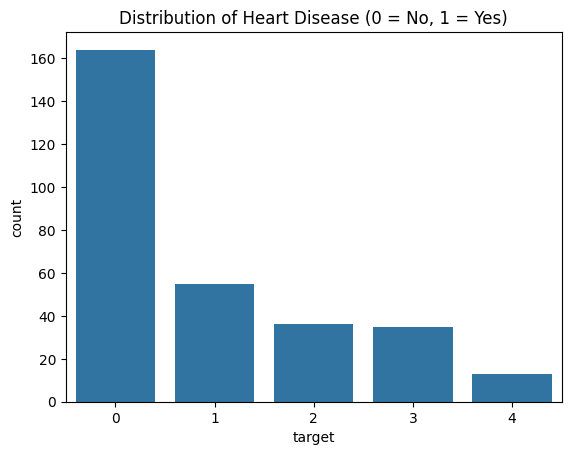

In [24]:

print(df.info())
print(df.describe())


print("\nMissing values per column:")
print(df.isnull().sum())


sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.show()

df.info()
Shows the structure of the dataset — number of rows, column names, and data types. Helps check for any non-numeric data or missing values.

df.describe()
Gives summary statistics like mean, min, max, and standard deviation for each feature. Useful to understand the data distribution and spot outliers.

df.isnull().sum()
Displays how many missing values are present in each column. This helps decide if we need to clean or impute any data.

sns.countplot(x='target', data=df)
Plots the number of people with (1) and without (0) heart disease. This helps us check if the target classes are balanced.

Let me know if you want this in markdown format too.









Ask ChatGPT


Accuracy: 0.5409836065573771

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.38      0.25      0.30        12
           2       0.22      0.22      0.22         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.32      0.33      0.32        61
weighted avg       0.51      0.54      0.52        61



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


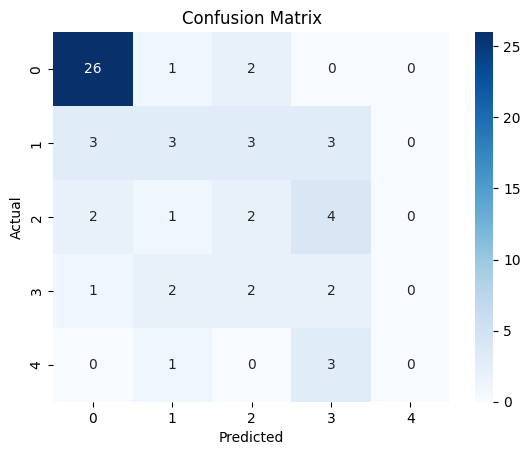

In [25]:

X_train_imputed = pd.DataFrame(X_train, columns=X.columns).fillna(pd.DataFrame(X_train, columns=X.columns).mean()).values
X_test_imputed = pd.DataFrame(X_test, columns=X.columns).fillna(pd.DataFrame(X_test, columns=X.columns).mean()).values


model = LogisticRegression()
model.fit(X_train_imputed, y_train)


y_pred = model.predict(X_test_imputed)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Accuracy: 0.54
The model correctly predicted the target class 54% of the time — moderate performance.

📌 Key Insights:

The model performs well on class 0 (no disease).

Poor performance on other classes, especially class 4, where no samples were predicted correctly (precision = 0).

Indicates class imbalance or the need for better model tuning or sampling techniques.

In [15]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.0 MB/s eta 0:00:00


In [26]:
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate
from sklearn.metrics import accuracy_score
import numpy as np


sensitive_feature = df["sex"][y_test.index]


y_test_binary = (y_test == 1).astype(int)
y_pred_binary = (y_pred == 1).astype(int)



metrics_with_pos_label = {
    'accuracy': accuracy_score,
    'false_positive_rate': lambda y_true, y_pred: false_positive_rate(y_true, y_pred, pos_label=1),
    'selection_rate': selection_rate
}


metrics_binary = {
    'accuracy': accuracy_score,
    'false_positive_rate': false_positive_rate,
    'selection_rate': selection_rate
}

frame = MetricFrame(metrics=metrics_binary, y_true=y_test_binary, y_pred=y_pred_binary, sensitive_features=sensitive_feature)



print("Overall Metrics:")
print(frame.overall)

print("\nMetrics by Sex (0 = Female, 1 = Male):")
print(frame.by_group)

Overall Metrics:
accuracy               0.770492
false_positive_rate    0.102041
selection_rate         0.131148
dtype: float64

Metrics by Sex (0 = Female, 1 = Male):
     accuracy  false_positive_rate  selection_rate
sex                                               
0.0  0.857143             0.076923        0.071429
1.0  0.744681             0.111111        0.148936


✅ Overall Metrics
Accuracy (0.77): The model is correct 77% of the time.

False Positive Rate (0.10): 10% of people were wrongly predicted positive.

Selection Rate (0.13): 13% of people were selected/predicted as positive.

| Metric              | Female (0) | Male (1) |
| ------------------- | ---------- | -------- |
| Accuracy            | 0.86       | 0.74     |
| False Positive Rate | 0.08       | 0.11     |
| Selection Rate      | 0.07       | 0.15     |


📌 Key Observations
The model is more accurate for females than males.

Males have a higher selection rate and a slightly higher false positive rate.

There might be bias toward selecting males, which could raise fairness concerns depending on the context (e.g. job hiring, loans, etc.).

Let me know if you want to reduce this bias.









Ask ChatGPT
